In [46]:
import pandas as pd
import numpy as np
import re
import sqlalchemy
from sqlalchemy import create_engine
import math
import random


In [47]:

df = pd.read_csv("CDD.csv", delimiter='\t')
 
pd.set_option("display.max.columns", None)
df

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Storm - Unspecified / Other,Christmas Island NS,25/12/2016 12:00:00 AM,"Christmas Island NS, December 25, 2016. Reside...",NaN,NaN,NaN,0.0,0.0,25/12/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10038.0,NaN
1,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Nova Scotia and Prince Edward Island,27/11/2016 12:00:00 AM,"Nova Scotia and Prince Edward Island, November...",NaN,NaN,NaN,0.0,0.0,29/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69000.0,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Red Earth First Nation SK,14/11/2016 12:00:00 AM,"Red Earth First Nation SK, July 14-18, 2016. H...",NaN,NaN,576.0,0.0,0.0,18/11/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Biological,Epidemic,Alberta and Saskatchewan,26/10/2016 12:00:00 AM,"Alberta and Saskatchewan, October 26 to Decemb...",NaN,NaN,NaN,16700000.0,780373.8,21/12/2016 12:00:00 AM,16700000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Incident,Technology,Hazardous Chemicals,Leak / Spill Release,Seaforth Channel BC,13/10/2016 12:00:00 AM,"Seaforth Channel BC, October 13, 2016. The art...",NaN,NaN,NaN,0.0,0.0,13/10/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,Disaster,Natural,Meteorological - Hydrological,Flood,Saint John River Basin NB,01/03/1902 12:00:00 AM,"Saint John River Basin NB, March 1902. An unus...",2.0,0.0,0.0,NaN,NaN,01/03/1902 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1085,Incident,Technology,Explosion,Non-Residential,Cranberry BC,01/01/1902 12:00:00 AM,"Cranberry BC, 1902. An explosion in the Extens...",32.0,0.0,0.0,NaN,NaN,01/01/1902 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1086,Incident,Technology,Explosion,Non-Residential,Grand Forks BC,01/01/1901 12:00:00 AM,"Grand Forks BC, 1901. An explosion in the Unio...",64.0,0.0,0.0,NaN,NaN,01/01/1901 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1087,Incident,Technology,Infrastructure failure,Manufacturing / Industry,Wellington BC,01/01/1901 12:00:00 AM,"Wellington BC, 1901. Sixteen people were entom...",16.0,0.0,0.0,NaN,NaN,01/01/1901 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EVENT CATEGORY                  1089 non-null   object 
 1   EVENT GROUP                     1089 non-null   object 
 2   EVENT SUBGROUP                  1089 non-null   object 
 3   EVENT TYPE                      1089 non-null   object 
 4   PLACE                           1089 non-null   object 
 5   EVENT START DATE                1089 non-null   object 
 6   COMMENTS                        1089 non-null   object 
 7   FATALITIES                      1000 non-null   float64
 8   INJURED / INFECTED              974 non-null    float64
 9   EVACUATED                       1019 non-null   float64
 10  ESTIMATED TOTAL COST            558 non-null    float64
 11  NORMALIZED TOTAL COST           558 non-null    float64
 12  EVENT END DATE                  10

Using the Canadian Disaster Database (CDD.csv, can be found on the share directory), you will explore the correlations between the numerical columns in the dataset. More info on the dataset can be found at https://www.kaggle.com/criticalhits/canadian-disaster-database#CDD.csv

In [49]:
df.describe()

,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
count,1000.000000,9.740000e+02,1019.000000,5.580000e+02,5.580000e+02,4.850000e+02,4.110000e+02,9.200000e+01,2.900000e+01,1.400000e+01,7.200000e+01,8.000000e+00,1.006000e+03,975.000000
mean,63.527000,2.088787e+03,1150.980373,4.839952e+07,2.870350e+06,1.194386e+07,1.521750e+06,1.715572e+07,1.091247e+08,2.039078e+08,1.802493e+08,1.639849e+06,1.982191e+05,0.083897
std,1583.137131,6.408480e+04,9261.735376,3.045786e+08,1.730852e+07,7.049849e+07,4.123510e+06,4.936284e+07,3.807072e+08,2.875737e+08,5.219343e+08,4.618999e+06,4.102981e+06,0.779602
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.580000e+05,1.440030e+05,4.000000e+02,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.311592e+05,3.344040e+05,4.570375e+06,8.999759e+06,2.559750e+03,0.000000e+00,0.000000
50%,0.000000,0.000000e+00,0.000000,4.621430e+05,3.135725e+04,0.000000e+00,0.000000e+00,1.824500e+06,1.766793e+06,3.228280e+07,2.140400e+07,5.818500e+03,0.000000e+00,0.000000
75%,2.000000,0.000000e+00,200.000000,9.526868e+06,7.527102e+05,1.944488e+06,1.372666e+06,1.140858e+07,2.975177e+07,3.248786e+08,6.867977e+07,1.398357e+04,0.000000e+00,0.000000
max,50000.000000,2.000000e+06,225000.000000,4.635720e+09,3.046476e+08,1.015742e+09,4.256084e+07,3.000000e+08,2.018484e+09,7.500000e+08,3.600000e+09,1.307128e+07,1.281690e+08,9.000000


<h1>1. Print the correlation matrix

In [50]:
corrMatrix=df.corr()
corrMatrix

,FATALITIES,INJURED / INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
FATALITIES,1.000000,0.998728,-0.003530,0.027839,0.031352,0.014838,-0.020317,-0.023630,0.965880,0.417442,0.241347,0.966678,-0.001548,-0.003988
INJURED / INFECTED,0.998728,1.000000,-0.003554,0.073538,0.080907,0.311491,0.404215,-0.002056,0.965286,-0.036915,0.456924,0.999639,-0.001498,-0.003356
EVACUATED,-0.003530,-0.003554,1.000000,0.660335,0.580352,0.406679,0.083692,0.212975,0.514186,0.154761,0.825937,0.838898,-0.002430,-0.005672
ESTIMATED TOTAL COST,0.027839,0.073538,0.660335,1.000000,0.985690,0.796016,0.571493,0.184582,0.992845,0.238737,0.923990,0.999996,0.412833,0.064788
NORMALIZED TOTAL COST,0.031352,0.080907,0.580352,0.985690,1.000000,0.770445,0.577570,0.158622,0.992722,0.201398,0.849023,0.999995,0.415388,0.049626
FEDERAL DFAA PAYMENTS,0.014838,0.311491,0.406679,0.796016,0.770445,1.000000,0.626224,0.070189,0.956807,-0.021965,0.779394,0.999958,0.022835,0.003859
PROVINCIAL DFAA PAYMENTS,-0.020317,0.404215,0.083692,0.571493,0.577570,0.626224,1.000000,0.115947,0.717184,1.000000,0.850335,0.998123,-0.003366,0.119110
PROVINCIAL DEPARTMENT PAYMENTS,-0.023630,-0.002056,0.212975,0.184582,0.158622,0.070189,0.115947,1.000000,0.078196,0.641075,0.299118,0.994163,-0.026786,NaN
MUNICIPAL COSTS,0.965880,0.965286,0.514186,0.992845,0.992722,0.956807,0.717184,0.078196,1.000000,NaN,0.991906,0.999999,0.765488,NaN
OGD COSTS,0.417442,-0.036915,0.154761,0.238737,0.201398,-0.021965,1.000000,0.641075,NaN,1.000000,NaN,NaN,-0.092983,0.208801


<h1> 2. Print a heat map of this correlation matrix (hint: use seaborn.heatmap())

In [51]:
import seaborn as sn
import matplotlib.pyplot as plt

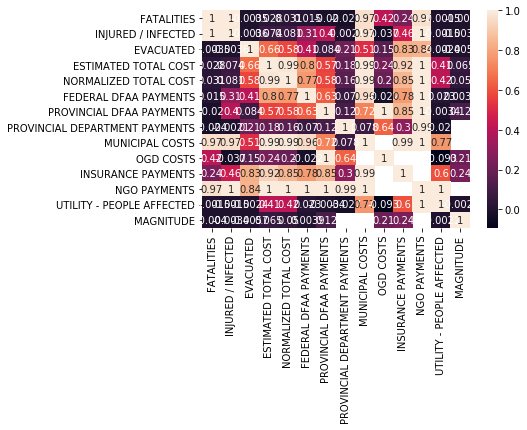

In [52]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

<h1>3.Find 3 pairs of columns, one pair that is highly positively correlated, one for which the correlation is almost zero and one pair that is negatively correlated. In each case write down an explanation why we see this correlation

<h2> Note this: </h2>
Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

In [59]:
""" First look the diagonal one which is positive correlated. The darker color is week correlation and no linear trend between 
variables. Example Fatality is no linear trend with Evacuated, Estimated Total Cost ... but there is relation with MUNICIPAL COSTS and 
NGO Cost... We can tell more using the graphy. Another General Example is NGO payment which is positive correlate with almost all of variables
Insurance Payment also but week in some where"""


' First look the diagonal one which is positive correlated. The darker color is week correlation and no linear trend between \nvariables. Example Fatality is no linear trend with Evacuated, Estimated Total Cost ... but there is relation with MUNICIPAL COSTS and \nNGO Cost... We can tell more using the graphy. Another General Example is NGO payment which is positive correlate with almost all of variables\nInsurance Payment also but week in some where'

<h1>4. Look up the pairplot function in Seaborn. Use it to plot the pairwise relations between the six columns you selected. Does what you see confirm your ideas? Describe in a comment.



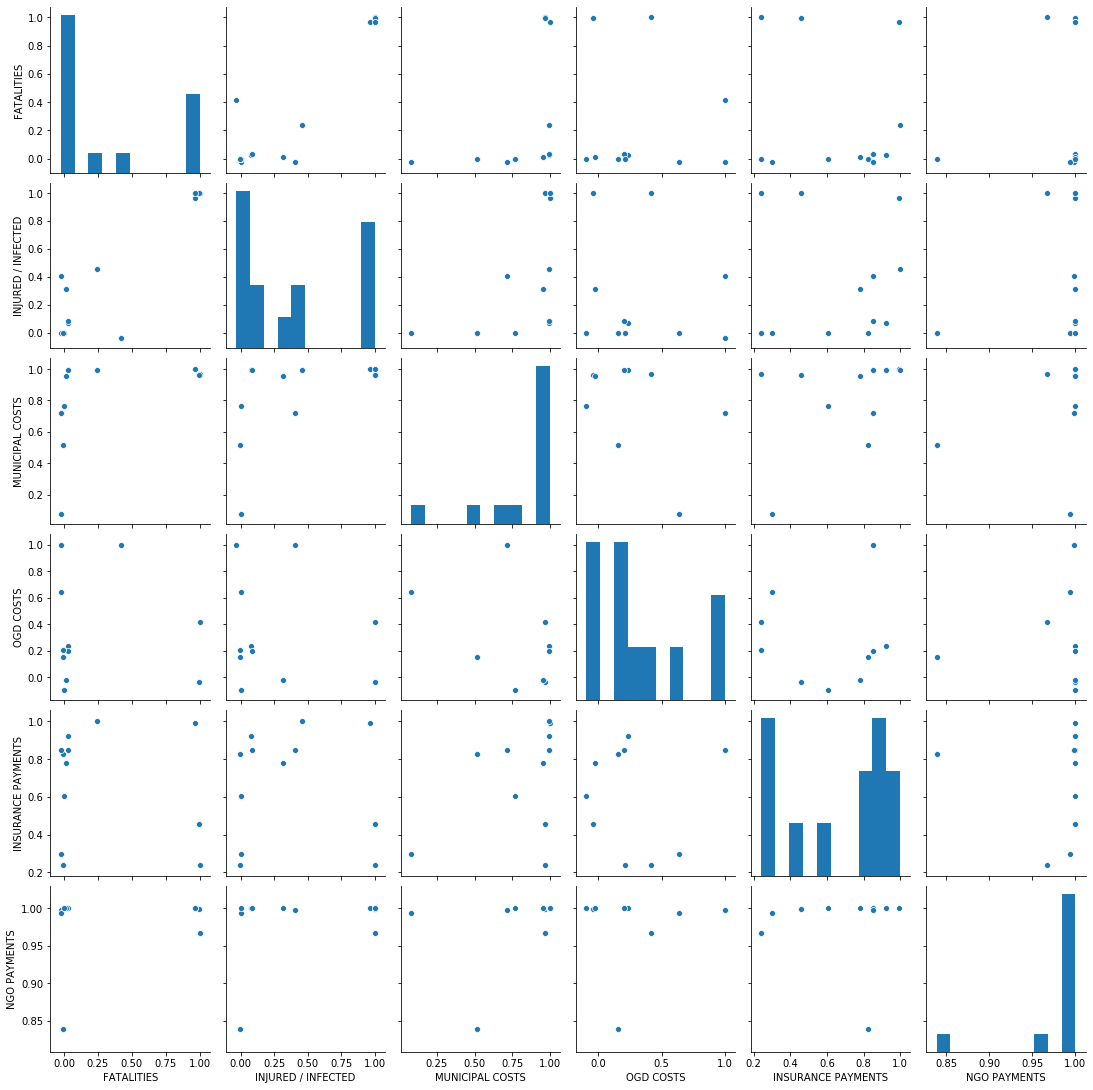

In [63]:
sn.pairplot(corrMatrix,vars = ['FATALITIES','INJURED / INFECTED', 'MUNICIPAL COSTS','OGD COSTS', 'INSURANCE PAYMENTS', 'NGO PAYMENTS']);

<h2>My Comment </h2>
The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. For example, the left-most plot in the second row shows the scatter plot of INJURED / INFECTED versus FATALITIES.